# Fall 2022 Data Science Intern Challenge 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

Ans: This was calculated using the excel  AVERAGE(D:D) function  and this gave the total amount of  $3145.13.
This is wrong because we want to look at just the 100 sneaker shops for each shoe model, the above calculation has repeated shop ids since its takes the average of the whole column

The correct evaluation method would be to look at the average order for each shop ID(per shop) and then find the average for all(100) of it.

What metric would you report for this dataset?

Ans: The mean of all 100 unique shops which is the total amount per shop ID divided by the total order times per shop ID.

What is its value?
Ans: approximately $408

In [2]:
import pandas as pd
df = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773


# Data Cleaning

In [4]:
# data describe
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [5]:
#check for null values
df.isnull().values.any()

False

In [6]:
# look at orders data over a 30 day window
df.sort_values(by=['created_at'])['created_at']

1862   2017-03-01 00:08:09.179
1741   2017-03-01 00:10:19.043
3228   2017-03-01 00:14:12.250
1267   2017-03-01 00:19:31.258
2689   2017-03-01 00:22:24.790
                 ...          
2630   2017-03-30 23:12:13.085
1685   2017-03-30 23:16:09.573
1474   2017-03-30 23:26:54.436
317    2017-03-30 23:41:34.347
2457   2017-03-30 23:55:35.408
Name: created_at, Length: 5000, dtype: datetime64[ns]

# Summary

In summary, there are no null values, there are maximum unique 100 shop_ids
the mean value for "order_amount" is 3145.128000 and that's where the false calculation came from. 
There is a 30 day window in March 2017 where there were different orders at different times in one day

# Average Order: Group By ShopID

In [44]:
#the first step is to get the total order amount in each shop
TotalAmount = df.groupby(['shop_id'])['order_amount'].agg('sum')

#print(TotalAmount)

#the second step is to get the total order items in each shop
TotalItems = df.groupby(['shop_id'])['total_items'].agg('sum')
#print(TotalItems)


#the third step is to divide the total amount by the total items to get the average order value for all 100 shops
#AOV = df['order_amount'].div(df['total_items'])
#i first divided it this way but i realized that his divides it for all
#5000 rows, the alternative approach was to use the concat function to combine the two columns 

#the third step is to divide the total amount by the total items to get the average order value for all 100 shops after
#concatenating the the two columns
group = pd.concat([TotalAmount, TotalItems], axis=1)

AOV = group['order_amount'].div(group['total_items'])
AOV.name = 'AOV'


#the fourth step is to concatenate all three columns and have it in a new data frame called df2, since the
#first two columns were calculated based on shop id grouped by the AOV is calculated based on that.
df2 = pd.concat([TotalAmount, TotalItems , AOV], axis=1)
df2


,order_amount,total_items,AOV
shop_id,,,
1.0,13588.0,86.0,158.0
2.0,9588.0,102.0,94.0
3.0,14652.0,99.0,148.0
4.0,13184.0,103.0,128.0
5.0,13064.0,92.0,142.0
...,...,...,...
96.0,16830.0,110.0,153.0
97.0,15552.0,96.0,162.0
98.0,14231.0,107.0,133.0


In [43]:
#statistical summary of the new data frame
df2.describe()

,order_amount,total_items,0
count,1.000000e+02,100.000000,100.000000
mean,1.572564e+05,439.360000,407.990000
std,1.216218e+06,3396.366111,2557.462906
min,6.840000e+03,67.000000,90.000000
25%,1.293050e+04,88.000000,132.750000
50%,1.488750e+04,100.000000,153.000000
75%,1.760000e+04,111.250000,168.250000
max,1.199018e+07,34063.000000,25725.000000


# Question 2: SQL

a. How many orders were shipped by Speedy Express in total?

SELECT COUNT (e.orderID) AS 'Total number of Orders', d.shipperName AS 'Shipper Name'
FROM orders e, shippers d
WHERE e.ShipperID=d.ShipperID
AND d.ShipperName like '%Speedy Express%'


Answer: 54 total orders were shipped by Speedy Express

b. What is the last name of the employee with the most orders?

SELECT d.Lastname AS 'Employee Last Name', COUNT(DISTINCT e.orderID) AS 'Total number of orders'
FROM orders e, employees d 
WHERE e.EmployeeID=d.EmployeeID
GROUP BY  d.employeeID 
ORDER BY COUNT ('Total number of orders') DESC

Answer: Peacock


c. What product was ordered the most by customers in Germany?

SELECT p.ProductName AS 'Product Name', SUM(d.Quantity) AS 'Total_Quantity',c.country
FROM Products p, OrderDetails d ,Orders o, Customers c,
WHERE d.OrderID = o.OrderID
AND o.CustomerID = c.CustomerID
AND p.ProductID = d.ProductID
AND c.country = "Germany"
GROUP BY  p.productID
ORDER BY Total_Quantity DESC

Answer: Boston Crab Meat

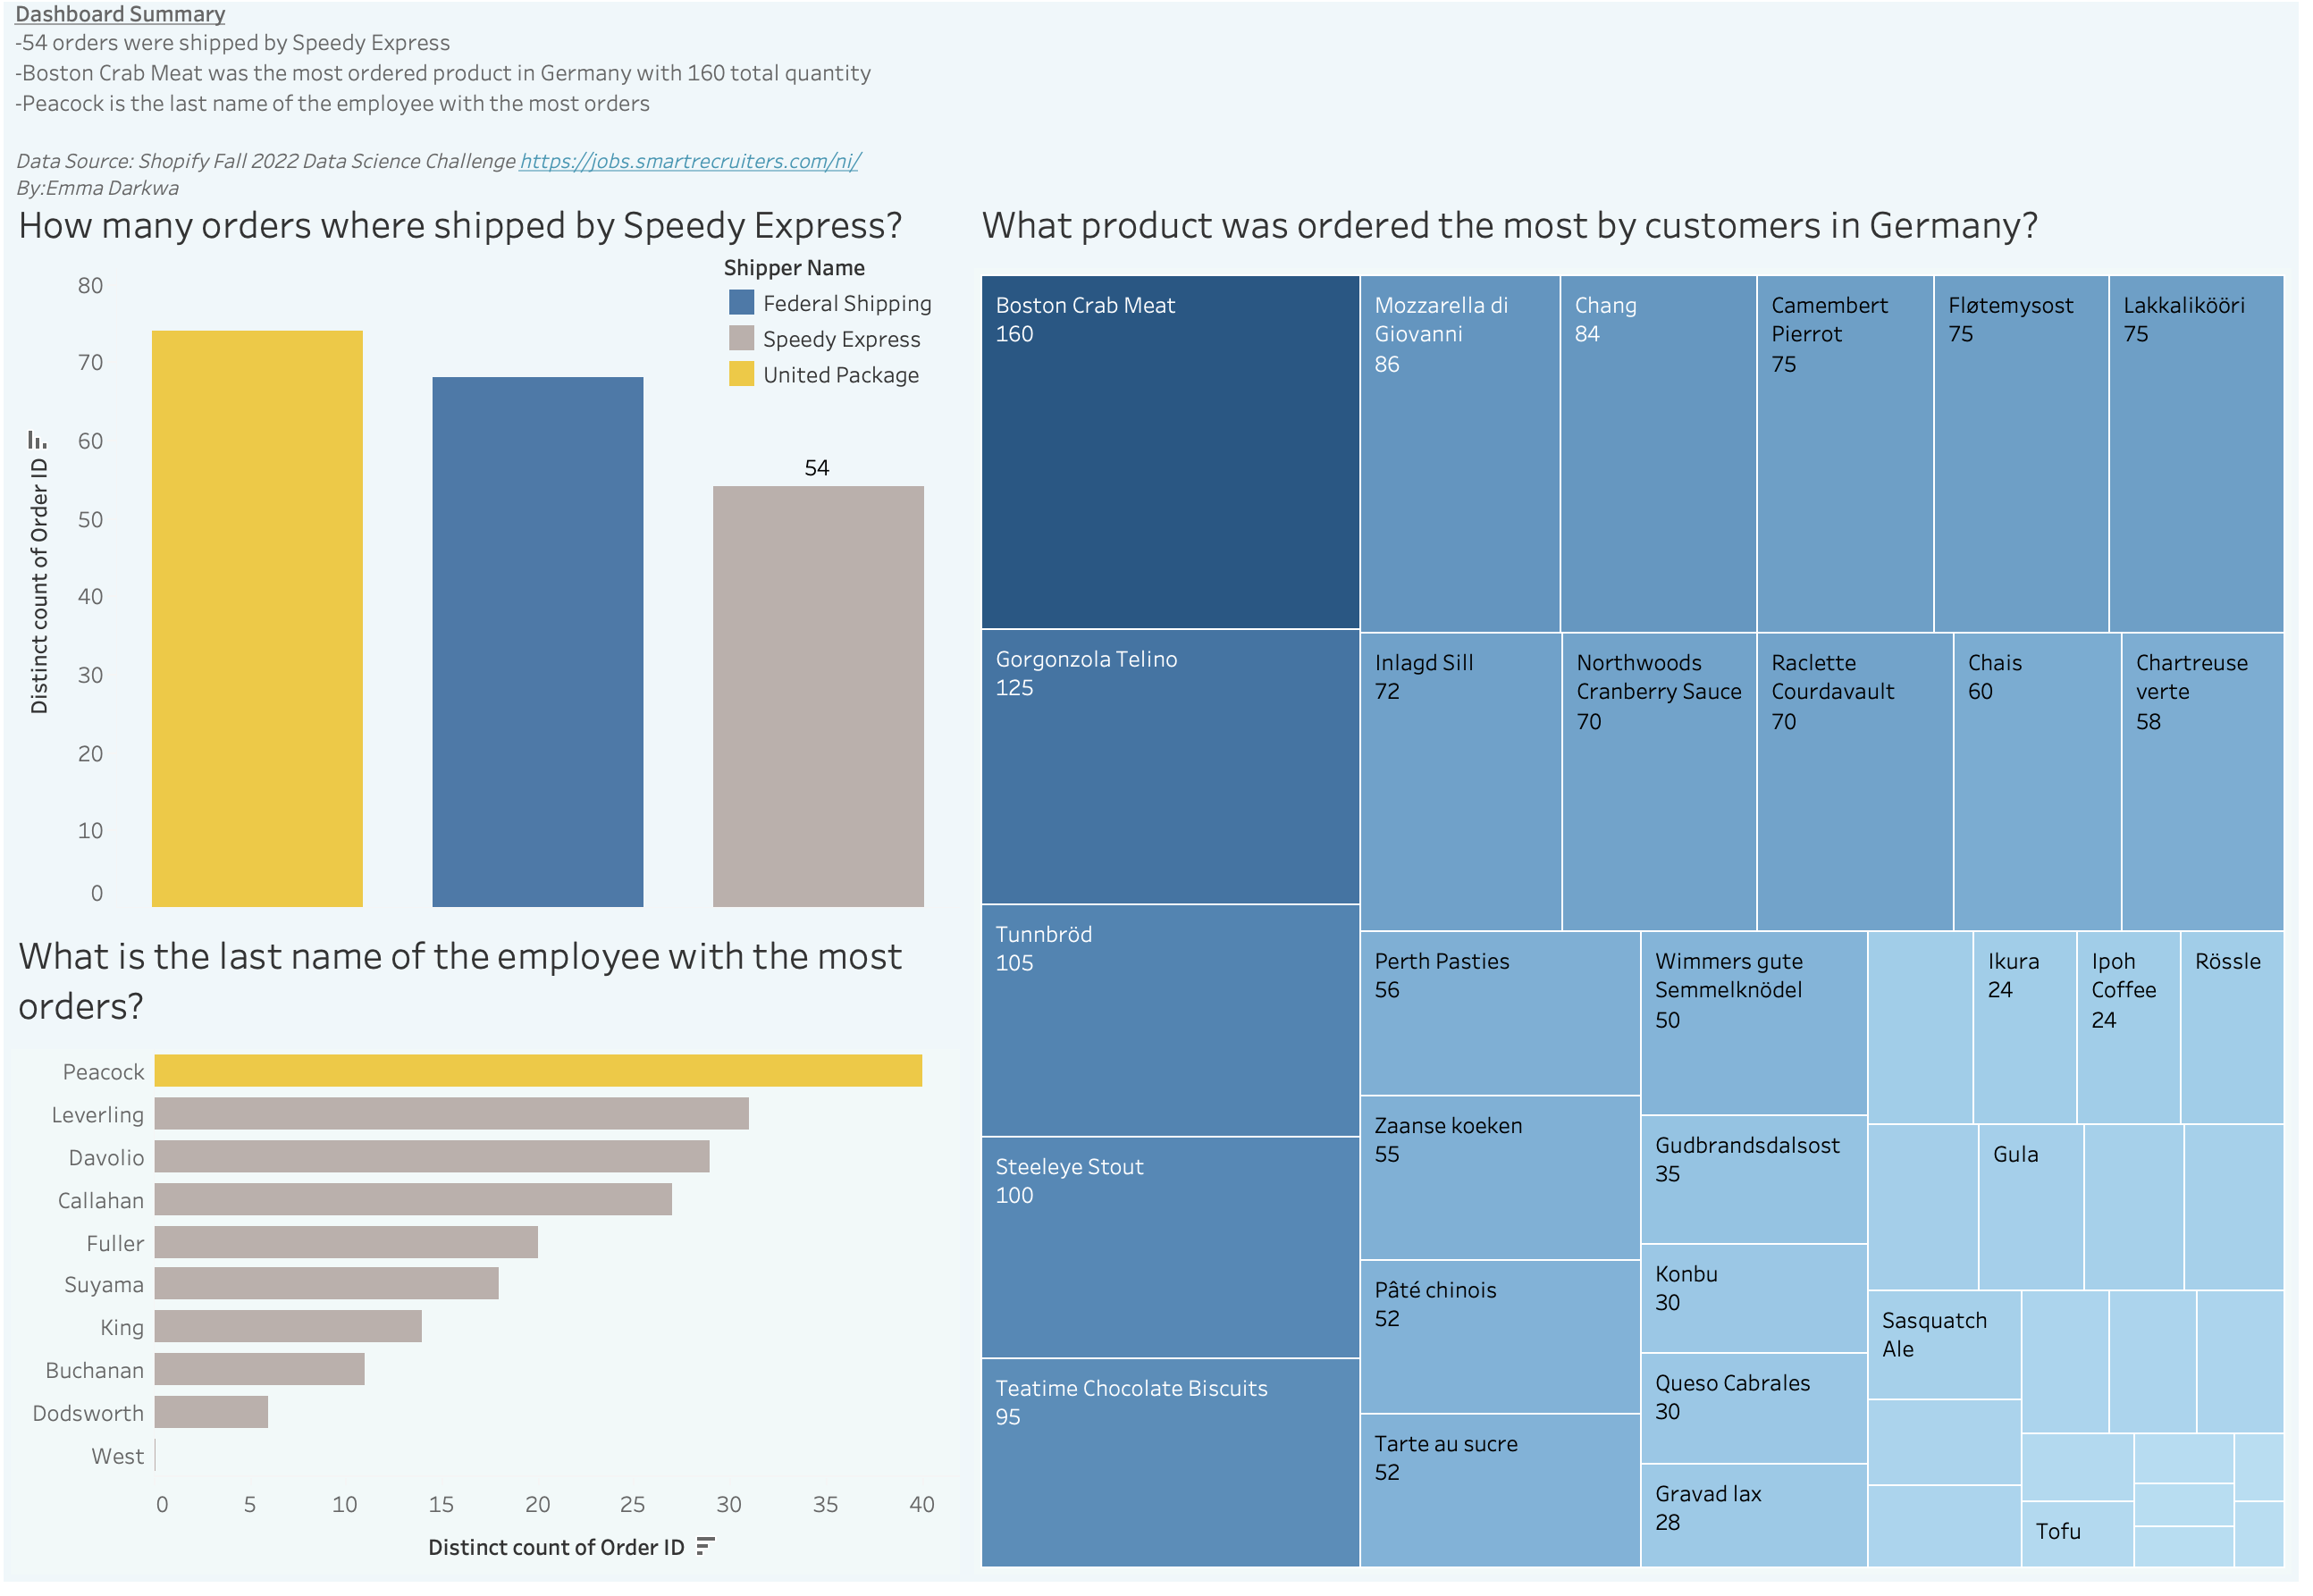